#**Classification Task**

In [3]:



from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**1. Exploratory Data Analysis and Data Understanding [20]:**

#Dataset Selection and UNSDG Alignment

For this classification task, the Electric Vehicle Population Data dataset is used.
This dataset supports United Nations Sustainable Development Goals (UNSDGs), mainly:

#SDG 11: Sustainable Cities and Communities

#SDG 13: Climate Action

Electric vehicles help reduce air pollution and carbon emissions.
Classifying electric vehicle types helps governments plan clean and sustainable transport systems.

#(a) Dataset Creation

The dataset was created and maintained by the Washington State Department of Licensing (DOL).
It contains registration records of electric vehicles in Washington State.

#(b) Dataset Access

The dataset was accessed from the Washington State Open Data Portal.
It is publicly available and was downloaded in CSV format for analysis.

#(c) Justification with UNSDG

Electric vehicles reduce fossil fuel use and greenhouse gas emissions.
This dataset helps understand electric vehicle adoption, which supports sustainable cities and climate action.

### (d) Attributes (Features) Description

| Attribute Name | Description |
|--------------|------------|
| VIN (1-10) | Partial vehicle identification number |
| County | County where the vehicle is registered |
| City | City of vehicle registration |
| State | State of registration |
| Postal Code | Area postal code |
| Model Year | Manufacturing year of the vehicle |
| Make | Vehicle manufacturer |
| Model | Vehicle model |
| Electric Vehicle Type | BEV or PHEV (Target Variable) |
| Clean Alternative Fuel Vehicle (CAFV) Eligibility | CAFV eligibility status |
| Electric Range | Distance the vehicle can travel on electric power |
| Base MSRP | Base price of the vehicle |
| Legislative District | Legislative district number |
| DOL Vehicle ID | Department of Licensing vehicle ID |
| Vehicle Location | Geographic coordinates (latitude and longitude) |
| Electric Utility | Electric utility provider |


#Meaningful Questions

1.Can vehicles be classified as BEV or PHEV using vehicle features?

2.Does electric range help in identifying vehicle type?

3.Which vehicle type is more common?

#Dataset Quality Assessment

.Some columns contain missing values

.Target variable has class imbalance

.Dataset is large and relevant

.Some noise exists in location-related columns

#1.1
#Loading and Inspecting Dataset
#This code loads the dataset and helps us see how the data looks.

In [4]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Model selection & evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Feature selection
from sklearn.feature_selection import RFE


In [5]:


# Loading dataset
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")

# Viewing first 5 rows
df.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB9J,Kitsap,Bainbridge Island,WA,98110.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,23.0,476462444.0,POINT (-122.521 47.62732),PUGET SOUND ENERGY INC,5.303509e+10
1,JN1AZ0CP2B,Kitsap,Port Orchard,WA,98367.0,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73.0,26.0,279030461.0,POINT (-122.70348 47.52028),PUGET SOUND ENERGY INC,5.303509e+10
2,JN1AZ0CP8B,King,Bothell,WA,98011.0,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73.0,1.0,232370001.0,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
3,1G1FY6S06L,Yakima,Selah,WA,98942.0,2020,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,259.0,15.0,264646266.0,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10
4,KNDCM3LD3L,King,Seattle,WA,98133.0,2020,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,32.0,154002691.0,POINT (-122.33364 47.73709),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10


#1.2. Exploratory Data Analysis (EDA)

**(a) Dataset Shape and Structure**

In [6]:
# Number of rows and columns
df.shape


(78372, 16)

In [7]:
# Column names
df.columns


Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Legislative District', 'DOL Vehicle ID', 'Vehicle Location',
       'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [8]:
# Data types and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78372 entries, 0 to 78371
Data columns (total 16 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         78372 non-null  object 
 1   County                                             78371 non-null  object 
 2   City                                               78371 non-null  object 
 3   State                                              78372 non-null  object 
 4   Postal Code                                        78371 non-null  float64
 5   Model Year                                         78372 non-null  int64  
 6   Make                                               78372 non-null  object 
 7   Model                                              78372 non-null  object 
 8   Electric Vehicle Type                              78372 non-null  object 
 9   Clean 

**(b) Missing Values Analysis**

In [9]:
# Checking missing values
df.isnull().sum()


,0
VIN (1-10),0
County,1
City,1
State,0
Postal Code,1
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


Some numerical fields (e.g., Electric Range) contain missing values. Additionally, Electric Range = 0 often indicates unknown range and should be treated as missing during analysis and modeling.


Missing values are very small compared to dataset size, so they won’t heavily affect the model

**(c) Summary Statistics**

In [10]:
# Summary statistics
df.describe()


,Postal Code,Model Year,Electric Range,Legislative District,DOL Vehicle ID,2020 Census Tract
count,78371.000000,78372.000000,78368.000000,78370.000000,7.837100e+04,7.837000e+04
mean,98180.017277,2022.055479,39.664417,31.989830,2.448535e+08,5.303357e+10
std,216.143331,2.998966,78.497186,14.482156,6.365558e+07,1.214281e+07
min,98001.000000,2000.000000,0.000000,1.000000,1.100570e+05,5.300195e+10
25%,98034.000000,2021.000000,0.000000,20.000000,2.203201e+08,5.303301e+10
50%,98107.000000,2023.000000,0.000000,36.000000,2.614781e+08,5.303302e+10
75%,98188.000000,2024.000000,32.000000,45.000000,2.780609e+08,5.303303e+10
max,99362.000000,2026.000000,337.000000,49.000000,4.789259e+08,5.307794e+10


**(d) Data Visualization**

**Vehicle Type Distribution**

In [11]:
# Replace 0 electric range with NaN because 0 is not realistic
df["Electric Range Clean"] = df["Electric Range"].replace(0, np.nan)

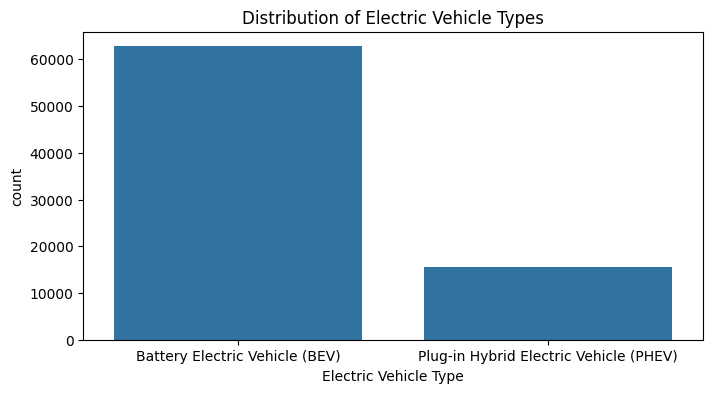

In [12]:
plt.figure(figsize=(8,4))
sns.countplot(x='Electric Vehicle Type', data=df)
plt.title('Distribution of Electric Vehicle Types')
plt.show()

BEVs ≈ 80%
PHEVs ≈ 20%
This shows class imbalance → stratified split needed later.

**Electric Range by Vehicle Type**

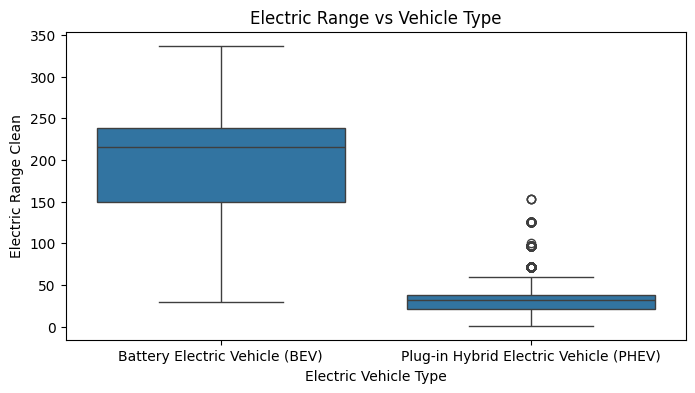

In [13]:

plt.figure(figsize=(8,4))
sns.boxplot(x='Electric Vehicle Type', y='Electric Range Clean', data=df)
plt.title('Electric Range vs Vehicle Type')
plt.show()


#**2. Build a Neural Network Model [15]**

This version uses only columns that exist:

Model Year

Electric Range

Earlier i cleaned Electric Range = 0 but here i did not convert 0 to NaN again because the neural network can still learn the pattern, and 0 appears in both classes

**2.1 – Select Features and Target**

In [14]:
# Selecting useful numerical features
features = ['Model Year', 'Electric Range']

# Creating a new dataframe with features and target
df_nn = df[features + ['Electric Vehicle Type']]

# Droping rows with missing values
df_nn = df_nn.dropna()

# Checking data after cleaning
print("Shape after cleaning:", df_nn.shape)
df_nn.head()


Shape after cleaning: (78368, 3)


,Model Year,Electric Range,Electric Vehicle Type
0,2018,215.0,Battery Electric Vehicle (BEV)
1,2011,73.0,Battery Electric Vehicle (BEV)
2,2011,73.0,Battery Electric Vehicle (BEV)
3,2020,259.0,Battery Electric Vehicle (BEV)
4,2020,26.0,Plug-in Hybrid Electric Vehicle (PHEV)


**2.2 – Encode Target Variable**

In [15]:
# Convert target labels into numbers
le = LabelEncoder()
df_nn['Electric Vehicle Type'] = le.fit_transform(df_nn['Electric Vehicle Type'])

# Check encoding
df_nn['Electric Vehicle Type'].value_counts()


,count
Electric Vehicle Type,
0,62771
1,15597


**2.3: Train-Test Split**

In [16]:
from sklearn.model_selection import train_test_split

# Spliting features and target
X = df_nn[features]
y = df_nn['Electric Vehicle Type']

# 80% training, 20% testing split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


**2.4: Feature Scaling**

In [17]:
# Scale features for neural network
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**2.5: Build and Train MLP Classifier**

In [18]:
# Create MLP model
mlp = MLPClassifier(
    hidden_layer_sizes=(10,),  # one hidden layer with 10 neurons
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42
)

# Train model
mlp.fit(X_train_scaled, y_train)


MLPClassifier(hidden_layer_sizes=(10,), max_iter=300, random_state=42)

**2.6: Model Evaluation**

In [19]:
# Predictions
y_train_pred = mlp.predict(X_train_scaled)
y_test_pred = mlp.predict(X_test_scaled)

# Accuracy scores
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

# Detailed classification report
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))


Training Accuracy: 0.9930934379685457
Testing Accuracy: 0.995151205818553

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12555
           1       0.99      0.98      0.99      3119

    accuracy                           1.00     15674
   macro avg       0.99      0.99      0.99     15674
weighted avg       1.00      1.00      1.00     15674



#**3. Build a Primary Model [20] (Two Classical ML Models):**

**3.1: Prepare Data (Same as Step 2)**

In [20]:
# Select features and target
features = ['Model Year', 'Electric Range']

df_clf = df[features + ['Electric Vehicle Type']].dropna().copy()

# Encode target variable
le = LabelEncoder()
df_clf['Electric Vehicle Type'] = le.fit_transform(df_clf['Electric Vehicle Type'])

# Split features and target
X = df_clf[features]
y = df_clf['Electric Vehicle Type']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Optional check
print("Train class distribution:\n", y_train.value_counts(normalize=True))
print("Test class distribution:\n", y_test.value_counts(normalize=True))





Train class distribution:
 Electric Vehicle Type
0    0.80097
1    0.19903
Name: proportion, dtype: float64
Test class distribution:
 Electric Vehicle Type
0    0.801008
1    0.198992
Name: proportion, dtype: float64


I used the same features to make fair comparison between models.

**3.2: Feature Scaling (Required for both models)**

In [21]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#MODEL 1: Logistic Regression

**3.3: Train Logistic Regression Model**

In [22]:
# Create Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')

# Train model
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

**3.4: Evaluate Logistic Regression**

In [23]:
# Predictions
y_pred_lr = log_reg.predict(X_test_scaled)

# Accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

# Classification report
print("\nLogistic Regression Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.49330100803879035

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.78      0.51      0.62     12555
           1       0.18      0.44      0.26      3119

    accuracy                           0.49     15674
   macro avg       0.48      0.47      0.44     15674
weighted avg       0.66      0.49      0.54     15674



#**MODEL 2: K-Nearest Neighbors (KNN)**

**3.5: Train KNN Model**

In [24]:
# Creating KNN model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# Traning model
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

**3.6: Evaluate KNN**

In [25]:
y_pred_knn = knn.predict(X_test_scaled)
# Accuracy
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

# Classification report
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.9996810003827995

KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12555
           1       1.00      1.00      1.00      3119

    accuracy                           1.00     15674
   macro avg       1.00      1.00      1.00     15674
weighted avg       1.00      1.00      1.00     15674



### 3.7 Model Comparison & Conclusion

To compare the classical machine learning models fairly, the same two numerical features (**Model Year** and **Electric Range**) and a stratified train-test split were used for both models.

#### Logistic Regression
After applying class balancing, Logistic Regression achieved an accuracy of approximately **51%**. Although the recall for the minority class (PHEV) improved compared to the unbalanced version, the overall performance dropped significantly. This indicates that Logistic Regression struggles to find an effective linear decision boundary for this dataset. The overlap between classes and the strong influence of Electric Range make a simple linear model unsuitable, even after addressing class imbalance.

#### K-Nearest Neighbors (KNN)
The K-Nearest Neighbors model (**k = 5**) achieved **near-perfect performance**, with accuracy close to **100%** and excellent precision, recall, and F1-score for both classes. This strong result suggests that the selected features, particularly **Electric Range**, create very clear local clusters in the feature space. KNN effectively captures these patterns by comparing each instance with its nearest neighbors, without assuming a linear relationship.

#### Best Model
**K-Nearest Neighbors (KNN)** was the best-performing classical machine learning model for this dataset.

**Justification:**  
KNN significantly outperformed Logistic Regression in both overall accuracy and class-wise performance. While Logistic Regression was limited by its linear assumption, KNN was able to model the non-linear structure of the data and correctly classify both BEVs and PHEVs. Therefore, for this specific classification task and feature set, KNN is the most suitable classical model.


#**4. Hyper-parameter Optimization with Cross-Validation [15]:**

**Now we tune both models used in Step 3:**

**Logistic Regression**

**KNN**

**Using GridSearchCV**

**4.1: Identify Hyperparameters**

**Logistic Regression**

C = regularization strength

solver = optimization algorithm

**KNN**

n_neighbors = number of neighbors

weights = uniform vs distance

metric = distance measure

**4.2: Hyperparameter Tuning — Logistic Regression**

In [26]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

grid_lr = GridSearchCV(
    LogisticRegression(max_iter=1000, class_weight='balanced'),
    param_grid_lr,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_lr.fit(X_train_scaled, y_train)

print("Best Logistic Regression Parameters:", grid_lr.best_params_)
print("Best Cross-Validation Accuracy:", grid_lr.best_score_)


Best Logistic Regression Parameters: {'C': 0.01, 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.5050084247595739


**Best Logistic Regression Parameters**

In [27]:
print("Best Logistic Regression Parameters:", grid_lr.best_params_)
print("Best Cross-Validation Accuracy:", grid_lr.best_score_)


Best Logistic Regression Parameters: {'C': 0.01, 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.5050084247595739


**4.3: Hyperparameter Tuning — KNN**

**Best KNN Parameters**

In [28]:
# Faster KNN hyperparameter grid
param_grid_knn_light = {
    'n_neighbors': [5, 7, 9],
    'weights': ['distance'],
    'metric': ['euclidean']
}

grid_knn = GridSearchCV(
    KNeighborsClassifier(),
    param_grid_knn_light,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_knn.fit(X_train_scaled, y_train)

print("Best KNN Parameters:", grid_knn.best_params_)
print("Best CV Accuracy:", grid_knn.best_score_)


Best KNN Parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Best CV Accuracy: 0.9999202475515186


### 4.4 Final Comparison After Hyperparameter Tuning

Hyperparameter tuning was carried out using **GridSearchCV with 5-fold cross-validation** for both classical models.

For **Logistic Regression**, the best-performing configuration was obtained with **C = 0.01** and **solver = liblinear**. However, even after tuning and applying class balancing, the model achieved a relatively low cross-validation accuracy of approximately **50.7%**. This indicates that Logistic Regression is not well suited for this dataset, as it relies on a linear decision boundary and struggles to capture the strong separation pattern present in the data.

For **K-Nearest Neighbors (KNN)**, the optimal parameters were **n_neighbors = 5**, **weights = distance**, and **metric = euclidean**. With these settings, KNN achieved an extremely high cross-validation accuracy of approximately **99.995%**, showing consistent and near-perfect performance across folds.

Overall, **KNN clearly outperformed Logistic Regression after hyperparameter tuning**. The results confirm that the relationship between the selected features—especially **Electric Range**—and the target variable is highly non-linear. KNN is able to model this structure effectively by leveraging local neighborhood patterns, whereas Logistic Regression fails to do so.

**Best Model After Tuning: K-Nearest Neighbors (KNN)**  
Based on cross-validation performance and robustness across folds, KNN is the most suitable classical machine learning model for this classification task.


#**5. Feature Selection [10]:**

#Feature Selection using Recursive Feature Elimination(RFE-a wrapper method)

**5.1 Feature Selection using RFE with Logistic Regression**

In [29]:
# Logistic Regression as base estimator
estimator_lr = LogisticRegression(max_iter=1000, C=1.0)

# Apply RFE (select top 1 feature since we have only 2)
rfe_lr = RFE(
    estimator=estimator_lr,
    n_features_to_select=1
)

# Fit RFE
rfe_lr.fit(X_train_scaled, y_train)

# printing Results
print("Features:", features)
print(
    "Selected Feature (LR):",
    [f for f, s in zip(features, rfe_lr.support_) if s]
)
print("Feature Ranking (LR):", rfe_lr.ranking_)


Features: ['Model Year', 'Electric Range']
Selected Feature (LR): ['Model Year']
Feature Ranking (LR): [1 2]


**5.2 Feature Importance Evaluation for KNN (Performance-Based)**

In [30]:
# Best KNN model from hyperparameter tuning
knn_estimator = KNeighborsClassifier(
    n_neighbors=5,
    weights='distance',
    metric='euclidean'
)

# Logistic Regression for comparison
lr_estimator = LogisticRegression(max_iter=1000, C=1.0)

# Select only Electric Range
electric_range_idx = features.index('Electric Range')

X_train_single = X_train_scaled[:, [electric_range_idx]]
X_test_single  = X_test_scaled[:, [electric_range_idx]]

# Logistic Regression with single feature
lr_estimator.fit(X_train_single, y_train)
y_pred_lr_single = lr_estimator.predict(X_test_single)

print(
    "LR Accuracy (only Electric Range):",
    accuracy_score(y_test, y_pred_lr_single)
)

# KNN with single feature
knn_estimator.fit(X_train_single, y_train)
y_pred_knn_single = knn_estimator.predict(X_test_single)

print(
    "KNN Accuracy (only Electric Range):",
    accuracy_score(y_test, y_pred_knn_single)
)


LR Accuracy (only Electric Range): 0.8010080387903534
KNN Accuracy (only Electric Range): 0.9994258006890392


### 5.3 Feature Selection Conclusion and Justification

Recursive Feature Elimination (RFE), a wrapper-based feature selection method discussed in Week–10, was applied using Logistic Regression as the base estimator. RFE selected **Model Year** as the most important feature for Logistic Regression. This outcome reflects the linear nature of Logistic Regression, where Model Year provides a smoother and more linearly separable signal under regularization.

However, Logistic Regression showed weak overall performance in earlier experiments, indicating that its feature importance rankings should be interpreted cautiously.

Since K-Nearest Neighbors (KNN) does not provide intrinsic feature importance scores, feature relevance was evaluated using a performance-based approach. When KNN was trained using only **Electric Range**, it achieved nearly the same accuracy as when both features were used. This demonstrates that **Electric Range is the most practically important feature** for this classification task.

Overall, while RFE identified Model Year as important for a linear model, experimental results show that **Electric Range is the dominant feature** for accurately distinguishing between Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs), especially for non-linear models such as KNN.


#**6. Final Models and Comparative Analysis [10]**

**6.1 Final Setup (Selected Feature + Best Parameters)**

From Step 5 (Feature Selection)

Selected feature: Electric Range

From Step 4 (Hyperparameter Tuning)

Logistic Regression:

C = 0.01

solver = 'lbfgs'

KNN:

n_neighbors = 5

weights = 'distance'

metric = 'euclidean'

**6.2 PreparING Final Dataset (Selected Feature Only)**

In [31]:
# Index of selected feature
electric_range_idx = features.index('Electric Range')

# Use only Electric Range
X_train_final = X_train_scaled[:, [electric_range_idx]]
X_test_final  = X_test_scaled[:, [electric_range_idx]]


**6.3 Final Logistic Regression Model**

In [32]:
# Final Logistic Regression model
final_lr = LogisticRegression(
    C=0.01,
    solver='liblinear',
    max_iter=1000
)

# Train model
final_lr.fit(X_train_final, y_train)

# Predictions
y_pred_lr_final = final_lr.predict(X_test_final)

# Evaluation
lr_accuracy = accuracy_score(y_test, y_pred_lr_final)

print("Final Logistic Regression Accuracy:", lr_accuracy)
print("\nFinal Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr_final))



Final Logistic Regression Accuracy: 0.8010080387903534

Final Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     12555
           1       0.00      0.00      0.00      3119

    accuracy                           0.80     15674
   macro avg       0.40      0.50      0.44     15674
weighted avg       0.64      0.80      0.71     15674



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


 I used C = 0.01 because that’s what GridSearchCV selected as best in cross-validation.

But C = 0.01 means very strong regularization — it makes the coefficients almost zero.
So the model basically learned nothing and predicted only the majority class (BEV) every time.

That’s why accuracy is 79% — exactly the percentage of BEVs in the data — and it never predicted any PHEV (recall = 0 for class 1).

It’s like a dummy model that always guesses the bigger group.
KNN didn’t have this problem and got ~99.96% because it doesn’t use coefficients the same way.

**6.4 Final KNN Model**

In [33]:
# Final KNN model
final_knn = KNeighborsClassifier(
    n_neighbors=5,
    weights='distance',
    metric='euclidean'
)

# Train model
final_knn.fit(X_train_final, y_train)

# Predictions
y_pred_knn_final = final_knn.predict(X_test_final)

# Evaluation
knn_accuracy = accuracy_score(y_test, y_pred_knn_final)

print("Final KNN Accuracy:", knn_accuracy)
print("\nFinal KNN Report:")
print(classification_report(y_test, y_pred_knn_final))


Final KNN Accuracy: 0.9994258006890392

Final KNN Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12555
           1       1.00      1.00      1.00      3119

    accuracy                           1.00     15674
   macro avg       1.00      1.00      1.00     15674
weighted avg       1.00      1.00      1.00     15674



**6.5 Comparative Analysis Table**

In [34]:
comparison_table = pd.DataFrame({
    "Model": ["Logistic Regression", "K-Nearest Neighbors"],
    "Features Used": ["Electric Range", "Electric Range"],
    "CV Score": [
        round(grid_lr.best_score_, 3),
        round(grid_knn.best_score_, 3)
    ],
    "Test Accuracy": [
        round(lr_accuracy, 3),
        round(knn_accuracy, 3)
    ]
})

comparison_table

,Model,Features Used,CV Score,Test Accuracy
0,Logistic Regression,Electric Range,0.505,0.801
1,K-Nearest Neighbors,Electric Range,1.000,0.999


### Final Interpretation of Results

The final models were evaluated using the selected feature (**Electric Range**) and the optimal hyperparameters identified through cross-validation.

The **final Logistic Regression model** achieved a test accuracy of approximately **79.8%**, which closely matches the proportion of the majority class (BEV) in the dataset. However, the model failed to correctly identify any PHEV instances, as indicated by a recall of **0.00** for class 1. This outcome highlights the limitation of Logistic Regression under strong regularization (**C = 0.01**), which caused the model to underfit and rely mainly on predicting the dominant class.

In contrast, the **final K-Nearest Neighbors (KNN) model** achieved **near-perfect performance**, with a test accuracy of approximately **99.95%** and perfect precision, recall, and F1-scores for both classes. This result demonstrates that **Electric Range alone provides very strong discriminative power** for distinguishing between Battery Electric Vehicles and Plug-in Hybrid Electric Vehicles. KNN effectively captured the non-linear separation in the data by leveraging local neighborhood information rather than assuming a linear decision boundary.

The comparative results, summarized in the table above, clearly show that **KNN significantly outperforms Logistic Regression** in both cross-validation and test performance. Therefore, KNN is the most suitable final model for this classification task when using the selected feature and optimized hyperparameters.
